# **Leetcode Capriccio**

### **Basics**

**Time complexity:**
- how the running time of an algorithm grows as the input size n grows
- It counts the number of “basic operations” (comparisons, assignments, loop iterations) in the worst case (often), ignoring constant factors

**Space complexity:**
- how the extra memory used by an algorithm grows as input size n grows
- “space” usually means extra space beyond the input (auxiliary space)

**Continue:**
- It does not end the loop.
- It jumps back to the top of the loop and starts the next iteration.

**Break:**
- It immediately exits the nearest loop.
- No more iterations happen.

In [7]:
for x in [1, 2, 3, 4]:
    if x == 2:
        continue
    print(x)

1
3
4


In [8]:
for x in [1, 2, 3, 4]:
    if x == 3:
        break
    print(x)

1
2


In [6]:
# nested loop
for i in range(3):
    for j in range(3):
        if j == 1:
            break
        print(i, j)

0 0
1 0
2 0


### **Array**

121. Best Time to Buy and Sell Stock (easy)

You are given an array prices where prices[i] is the price of a given stock on the ith day. You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

- Time complexity: o(n)
- Space complexity: o(1)

In [40]:
def maxProfit(prices):
    min_price = float("inf")
    max_profit = 0

    for price in prices:
        if price < min_price:
            min_price = price
        else:
            max_profit = max(max_profit, price - min_price)

    return max_profit

In [44]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

In [42]:
def maxProfit(prices):
    l = 0
    r = 1
    max_profit = 0

    while r < len(prices):
        if prices[r] > prices[l]:
            profit = prices[r] - prices[l]
            max_profit = max(max_profit, profit)
            r += 1
        else:
            l = r
            r += 1
    return max_profit

In [43]:
prices = [7,1,5,3,6,4]
maxProfit(prices)

5

268. Missing Number (easy)

Given an array nums containing n distinct numbers in the range [0, n], return the only number in the range that is missing from the array.
- Time complexity: o(n)
- Space complexity: o(1)

In [21]:
class Solution:
    def missingNumber_slow(self, nums):
        for i in range(len(nums)+1): # slow: o(n^2)
            if i not in nums:
                return i

    def missingNumber_bit(self, nums):
        bit = 0
        for idx, num in enumerate(nums):
            bit ^= num
            bit ^= (idx + 1)
        return bit

    def missingNumber(self, nums):
        res = len(nums)
        for i, num in enumerate(nums):
            res += i - num
        return res

In [24]:
nums = [3,0,1]
sol = Solution()
sol.missingNumber(nums)

2

5. Longest Palindromic Substring (medium)

Given a string s, return the longest palindromic substring in s.
- Time complexity: o(n^2)
- Space complexity: o(n)

In [1]:
def longestPalindrome(s):
    result = ""
    result_len = 0

    for i in range(len(s)):
        # odd length
        l, r = i, i
        while l >= 0 and r < len(s) and s[l] == s[r]:
            if result_len <  r - l + 1:
                result = s[l:r+1]
                result_len = r - l + 1
            l -= 1
            r += 1

        # even length
        l, r = i, i+1
        while l >= 0 and r < len(s) and s[l] == s[r]:
            if result_len <  r - l + 1:
                result = s[l:r+1]
                result_len = r - l + 1
            l -= 1
            r += 1

    return result

In [3]:
s = "babad"
longestPalindrome(s)

'bab'

27. Remove Element (easy)

Given an integer array nums and an integer val, remove all occurrences of val in nums in-place. The order of the elements may be changed. Then return the number of elements in nums which are not equal to val.

- Time complexity: o(n)
- Space complexity: o(1)

In [ ]:
def removeElement(nums, val):
    index = 0
    for item in nums:
        if item != val:
            nums[index] = item
            index += 1
    return index

In [9]:
# slow and fast pointers: similar to above
def removeElement_sf(nums, val):
    slow = 0 # index of the new list
    fast = 0 # find the elements left and save to the new list
    while fast < len(nums):
        if nums[fast] != val:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    return slow

In [ ]:
# two pointers
def removeElement_tp(nums, val):
    left, right = 0, len(nums) - 1
    while left <= right:
        while left <= right and nums[left] != val:
            left += 1 # find the index where we should store the new list
        while left <= right and nums[right] == val:
            right -= 1 # find the index where we want to save to the new list
        if left < right: # no need to have "=" as no need to assign the value is left = right
            nums[left] = nums[right]
            left += 1
            right -= 1
    return left # count = index + 1


Note:
erase function: o(n)

59. Spiral Matrix II (medium)

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

- Time complexity: o(n)
- Space complexity: o(n)

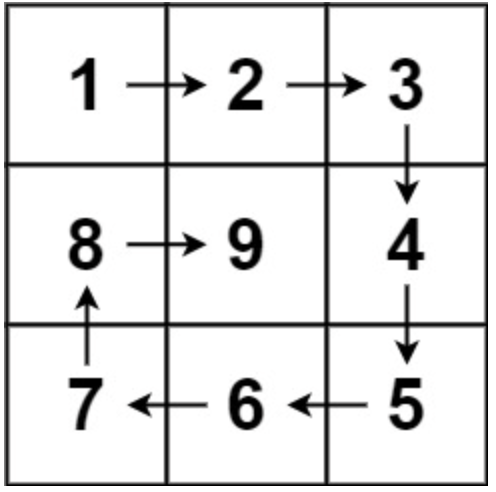

In [8]:
def generateMatrix(n):
    nums = [[0]*n for _ in range(n)]
    startx, starty = 0, 0 # starting point
    loop, mid = n//2, n//2 # count of loops: n//2
    count = 1 # numbers to be inserted

    for offset in range(1, loop + 1): # offsite also +1 after loop +1
        for j in range(starty, n - offset): # from left to right [left, right)
            nums[startx][j] = count
            count += 1
        for i in range(startx, n - offset): # from top to bottom [top, bottom)
            nums[i][j+1] = count # j+1 is fixed value
            count += 1
        for j in range(n - offset, starty, -1): # from right to left [right, left)
            nums[i+1][j] = count # i+1 is fixed value
            count += 1
        for i in range(n-offset, startx, -1): # from bottom to top [bottom, top)
            nums[i][starty] = count
            count += 1
        startx += 1 # updating starting point
        starty += 1

    if n % 2 != 0: # if n is odd, then add the last count to the center
        nums[mid][mid] = count
    return nums

In [9]:
n = 3
generateMatrix(n)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

In [6]:
n = 4
nums = [[0] * n for _ in range(n)]
nums

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

### **Binary search**
- Array needs to be sorted
- Can be used to find the first and last item that satisfy certain condition

704. Binary Search (easy)

Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.
- Time complexity: o(logn)
- Space complexity: o(1)

In [13]:
# method 1
def search(nums, target):
    low = 0
    high = len(nums) - 1 # define target in [left, right]
    while low <= high: # include case of single number
        mid = low + (high - low) // 2
        if nums[mid] < target:
            low = mid + 1
        elif nums[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

In [ ]:
# [Module!] method 1 - handles repeating elements
def search(nums, target):
    low = 0
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target <= nums[mid]: # condition
            high = mid - 1
        else:
            low = mid + 1
    if low == len(nums) or nums[low] != target:
        return -1
    return low

In [14]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

In [17]:
# method 2
def search(nums, target):
    low = 0
    high = len(nums) # define target in [left, right)
    while low < high: # include case of single number
        mid = low + (high - low) // 2
        if nums[mid] < target:
            low = mid + 1
        elif nums[mid] > target:
            high = mid
        else:
            return mid
    return -1

In [18]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

34. Find First and Last Position of Element in Sorted Array (medium)

Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value. If target is not found in the array, return [-1, -1].

- Time complexity: o(logn)
- Space complexity: o(1)

In [29]:
def searchRange(nums, target):
    # look for the starting position of the target value
    low = 0
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target <= nums[mid]:
            high = mid - 1 # high points to the 1 element to the left of the low
        else:
            low = mid + 1 # low is the first index satisfy with nums[index] >= target
    start = low # want the starting point of the target value

    # if starting position of the target is:
    # 1. bigger than all elements or 2. not in the original list at all
    # no need to proceed to find the last position
    if start == len(nums) or nums[start] != target:
        return [-1, -1]

    # look for the ending position of the target value
    high = len(nums) - 1
    while low <= high:
        mid = low + (high - low) // 2
        if target < nums[mid]:
            high = mid - 1 # high points to the 1 element to the left of the low
        else:
            low = mid + 1 # low is the first index satisfy with nums[index] > target
    end = low - 1 # (or high) want the ending point of the target value

    return [start, end]

In [30]:
nums = [5,7,7,8,8,10]
target = 8
searchRange(nums, target)

[3, 4]

35. Search Insert Position (easy)

Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.
- Time complexity: o(logn)
- Space complexity: o(1)

In [37]:
def searchInsert(nums):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        # if nums[mid] == target:
        #     return mid
        if target <= nums[mid]:
            right = mid - 1
        else:
            left = mid + 1
    return left

In [38]:
nums = [1,3,5,6]
target = 2
searchInsert(nums)

1

69. sqrt(x) (easy)

Given a non-negative integer x, return the square root of x rounded down to the nearest integer. The returned integer should be non-negative as well
- Time complexity: o(logn)
- Space complexity: o(1)

In [26]:
def mySqrt(x):
    low = 1
    high = x

    # find the last element that satisfy the condition
    while low <= high:
        mid = low + (high - low) // 2
        # if x == mid * mid:
        #     return mid
        if x < mid * mid:
            high = mid - 1
        else:
            low = mid + 1
    return low - 1

In [27]:
mySqrt(8)

2

In [28]:
mySqrt(9)

3

33. Search in Rotated Sorted Array (medium)

Prior to being passed to your function, nums is possibly left rotated at an unknown index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be left rotated by 3 indices and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

- Time complexity: o(logn)
- Space complexity: o(1)

In [7]:
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r - l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] >= nums[l]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
        else:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
    return -1

In [8]:
nums = [4,5,6,7,0,1,2]
target = 7
search(nums, target)

3

In [2]:
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] <= nums[r] <= nums[l]:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
        elif nums[l] <= nums[mid] <= nums[r]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
        elif nums[r] <= nums[l] <= nums[mid]:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1
    return - 1

In [1]:
# simplify to below
def search(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[mid] == target:
            return mid
        elif nums[mid] <= nums[r] <= nums[l]:
            if nums[mid] < target <= nums[r]:
                l = mid + 1
            else:
                r = mid - 1
        else:
            if nums[l] <= target < nums[mid]:
                r = mid - 1
            else:
                l = mid + 1

    return - 1

153. Find minimum in rotated sorted array (medium)

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

- Time complexity: o(logn)
- Space complexity: o(1)

In [3]:
def findMin(nums):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = l + (r -l) // 2
        if nums[l] <= nums[mid] <= nums[r]:
            return nums[l]
        elif nums[r] <= nums[l] <= nums[mid]:
            l = mid + 1
        else: # nums[mid] <= nums[r] <= nums[l]
            r = mid
    return -1

In [5]:
nums = [4,5,6,7,0,1,2]
findMin(nums)

0

875. Koko Eating Bananas (medium)

- There are n piles of bananas, the ith pile has piles[i] bananas.
- The guards will come back in h hours.
- Koko's bananas-per-hour eating speed: k.
    - Each hour, she eats k bananas from a chosen pile.
    - If the pile has < k bananas, she eats all of them and will not eat any more bananas during this hour.
- Return the minimum integer k such that she can eat all the bananas within h hours.

- Time complexity: o(logn); Space complexity: o(1)

In [7]:
def minEatingSpeed(piles, h):
    def total_hour(k):
        total_hour = 0
        for i in piles:
            total_hour += i // k + (i % k != 0)
        return total_hour

    l, r = 1, max(piles)
    while l <= r:
        mid = l + (r-l) // 2
        if h >= total_hour(mid): # condition
            r = mid - 1
        else:
            l = mid + 1
    return l

In [8]:
piles = [3,6,7,11]
h = 8
minEatingSpeed(piles, h)

4

1011. Capacity To Ship Packages Within D Days (medium)

A conveyor belt has packages that must be shipped from one port to another within days days.

The ith package on the conveyor belt has a weight of weights[i]. Each day, we load the ship with packages on the conveyor belt (in the order given by weights). We may not load more weight than the maximum weight capacity of the ship.

Return the least weight capacity of the ship that will result in all the packages on the conveyor belt being shipped within days days.

- Time complexity: o(logn)
- Space complexity: o(1)

In [13]:
# this is wrong code!
def total_day(k):
    total_day = 0
    for i, val in enumerate(weights):
        sum_weight = 0
        while sum_weight <= k:
            sum_weight += val
        total_day += 1
    return total_day

In [14]:
weights = [3,2,2,4,1,4]
total_day(6)

6

In [55]:
def shipWithinDays(weights, days):
    def total_day(k):
        day = 0
        sum_weight = 0
        for val in weights:
            if sum_weight + val > k:
                day += 1
                sum_weight = val
            else:
                sum_weight += val
        day += 1
        return day

    l, r = max(weights), sum(weights)
    while l <= r:
        mid = l + (r - l) // 2
        if days >= total_day(mid):
            r = mid - 1
        else:
            l = mid + 1
    return l

In [56]:
weights = [3,2,2,4,1,4]
days = 3
shipWithinDays(weights, days)

6

Other problems:

1482. Minimum Number of Days to Make m Bouquets (medium)
1552. Magnetic Force Between Two Balls (medium)
162. Find Peak Element (medium) — also feels like answer-search
774. Minimize Max Distance to Gas Station (hard-ish; floating / precision)
410. Split Array Largest Sum (hard)
4. Median of Two Sorted Arrays (hard)

### **Sliding windows**

3. Longest Substring Without Repeating Characters (medium)

Given a string s, find the length of the longest substring without duplicate characters.
- Time complexity: o(n)
- Space complexity: o(n) - set

In [3]:
def lengthOfLongestSubstring(s):
    p0 = 0
    max_len = 0
    dict_map = set()

    for i, val in enumerate(s):
        while val in dict_map:
            dict_map.remove(s[p0])
            p0 += 1
        dict_map.add(val)
        max_len = max(max_len, i - p0 + 1)

    return max_len

In [4]:
s = "abcabcbb"
lengthOfLongestSubstring(s)

3

209. Minimum Size Subarray Sum (medium)

Given an array of positive integers nums and a positive integer target, return the minimal length of a subarray whose sum is greater than or equal to target. If there is no such subarray, return 0 instead.
- Time complexity: o(n) - Each element enters the sliding window and is processed once, and leaves the window and is processed once. So every element is processed twice, meaning the time complexity is 2*n, which is o(n)
- Space complexity: o(1)

In [2]:
def minSubArrayLen(target, nums):
    p0 = 0
    cur_sum = 0
    min_len = float('inf')

    for i in range(len(nums)): # denote the ending point of the window
        cur_sum += nums[i]
        while cur_sum >= target:
            min_len = min(min_len, i - p0 + 1)
            cur_sum -= nums[p0]
            p0 += 1 # denote the starting point of the window

    if min_len == float('inf'):
        return 0

    return min_len # min_len if min_len != float('inf') else 0

In [3]:
nums = [2,3,1,2,4,3]
target = 7
minSubArrayLen(target, nums)

2

In [4]:
# two pointers
def minSubArrayLen_1(s, nums):
    left = 0
    right = 0
    min_len = float('inf')
    cur_sum = 0

    while right < len(nums):
        cur_sum += nums[right]

        while cur_sum >= s:
            min_len = min(min_len, right - left + 1)
            cur_sum -= nums[left]
            left += 1

        right += 1

    return min_len if min_len != float('inf') else 0

In [5]:
nums = [2,3,1,2,4,3]
target = 7
minSubArrayLen_1(target, nums)

2

904. Fruit Into Baskets (medium)

You only have two baskets, and each basket can only hold a single type of fruit. There is no limit on the amount of fruit each basket can hold.
Starting from any tree of your choice, you must pick exactly one fruit from every tree (including the start tree) while moving to the right. The picked fruits must fit in one of your baskets.
Once you reach a tree with fruit that cannot fit in your baskets, you must stop.
Given the integer array fruits, return the maximum number of fruits you can pick.

- Time complexity: o(n)
- Space complexity: o(n)

In [1]:
import collections

def totalFruit(fruits):
    p0 = 0
    fruit_count = collections.defaultdict(int)
    max_num = 0

    for i, val in enumerate(fruits):
        fruit_count[val] += 1
        while len(fruit_count) > 2:
            fruit_count[fruits[p0]] -= 1
            if fruit_count[fruits[p0]] == 0:
                del fruit_count[fruits[p0]]
            p0 += 1
        max_num = max(max_num, i - p0 + 1)

    return max_num

In [2]:
fruits = [3,3,3,1,2,1,1,2,3,3,4]
totalFruit(fruits)

5

### **Prefix Sum**
To calculate range sum

58. Range Sum (not leetcode)

For the cumulative sum from index 2 to index 5 in the vec array, we can just use p[5] - p[1], which is o(1)
- Precompute p once: o(n)
- Each query answered in o(1)
- Total for many queries: o(n + q)

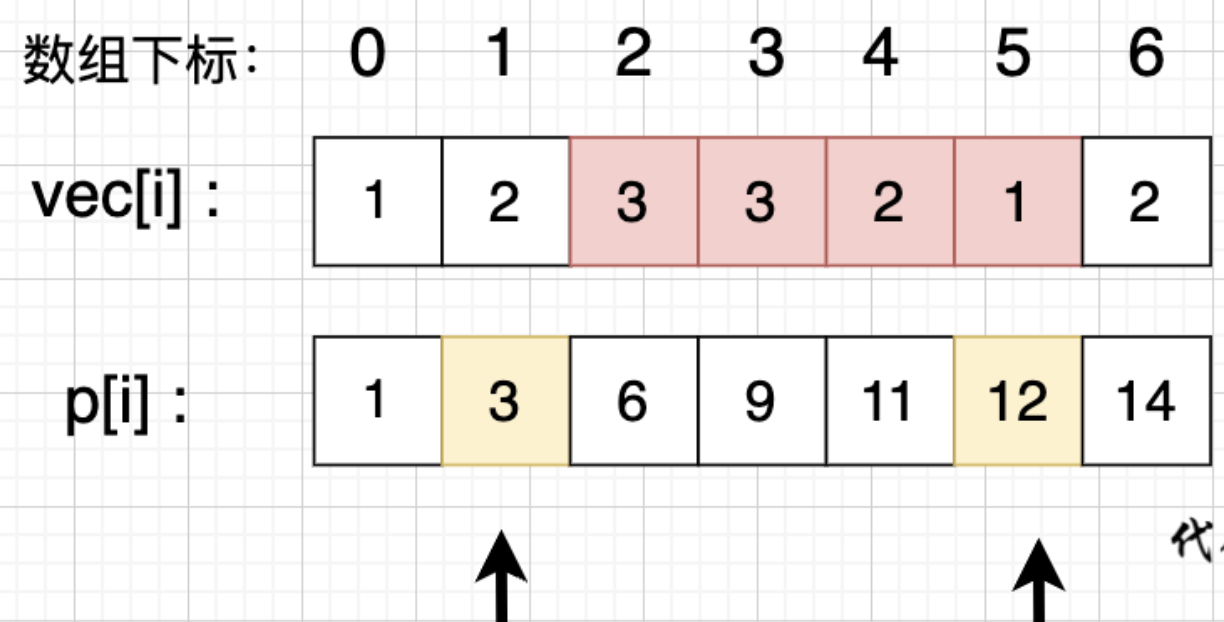

In [6]:
def sum_query(vec, a, b):
    # calculate prefix sum list
    prefix_sum = []
    pre_sum = 0
    for i in vec:
        pre_sum += i
        prefix_sum.append(pre_sum)

    # query for sum over index [a, b] of vec list
    sum = prefix_sum[b] - prefix_sum[a-1]

    return sum


In [7]:
vec = [1, 2, 3, 3, 2, 1, 2]
a = 2
b = 5
sum_query(vec, a, b)

9

### **Sorting**

252. Meeting Rooms (easy)

You are given an array of meeting time intervals, represented as intervals[i] = [starti, endi]. Each interval contains a start time and an end time for a meeting. Your task is to determine whether a person can attend all the meetings without any time conflicts.
- Time complexity: o(nlogn) - sorting
- Space complexity: o(1)

In [36]:
def can_attend_meetings(intervals):
    intervals.sort() # sort the intervals by start time: intervals.sort(key=lambda x: x[0])
    for i in range(len(intervals) - 1):
        if intervals[i+1][0] < intervals[i][1]: # check for any overlapping between consecutive meetings
            return False
    return True

In [37]:
intervals = [[0, 30], [5, 10], [15, 20]]
can_attend_meetings(intervals)

False

In [38]:
intervals = [[0, 3], [5, 10], [15, 20]]
can_attend_meetings(intervals)

True

Note: Sort by end time:
```intervals.sort(key=lambda x: x[1])```

### **Two pointers**

125. Valid Palindrome (easy)

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Given a string s, return true if it is a palindrome, or false otherwise.

- Time complexity: o(n)
- Space complexity: o(1)

In [47]:
def isPalindrome(s):
    l = 0
    r = len(s) - 1
    while l < r:
        while l < r and not s[l].isalnum():
            l += 1
        while l < r and not s[r].isalnum():
            r -= 1
        if s[l].lower() != s[r].lower():
            return False
        l += 1
        r -= 1
    return True

In [48]:
s = "A man, a plan, a canal: Panama"
isPalindrome(s)

True

Note:

1. .isalnum() returns True if that character is alphanumeric:
- a letter (a-z, A-Z, and many Unicode letters)
- or a digit (0-9)
2. .lower() converts string to lower case; .upper() converts string to upper case

11. Container with most water (medium)

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]). Find two lines that together with the x-axis form a container, such that the container contains the most water. Return the maximum amount of water a container can store.
- Time complexity: o(n)
- Space complexity: o(1)

In [4]:
def maxArea(height):
    l, r = 0, len(height) - 1
    max_amount = 0

    while l < r:
        max_amount = max(max_amount, (r - l) * min(height[l], height[r]))
        if height[l] <= height[r]:
            l += 1
        else:
            r -= 1

    return max_amount

In [5]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height)

49

977. Squares of a Sorted Array (easy)

Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

- Time complexity: o(n)
- Space complexity: o(n) - result

In [11]:
def sortedSquares(nums):

    # if all values are positive:
    if nums[0] >= 0:
        return [i**2 for i in nums]
    # if all values are negative:
    if nums[-1] < 0:
        return [i**2 for i in nums[::-1]]

    # if mix of positive and negative values
    l, r = 0, len(nums) - 1
    i = len(nums) - 1 # index of the new list
    result = [0]*len(nums) # need to pre-allocate result to the right length, otherwise will index out of bound error
    while l <= r:
        if nums[l]**2 <= nums[r]**2:
            result[i] = nums[r]**2
            r -= 1
        else:
            result[i] = nums[l] ** 2
            l += 1
        i -= 1
    return result

In [12]:
nums = [-4,-1,0,3,10]
sortedSquares(nums)

[0, 1, 9, 16, 100]

15. 3Sum (medium)

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.
- Time complexity: o(n^2) - (More efficient than hash map)
- Space complexity: o(n) - result

In [5]:
def threeSum(nums):
    nums.sort()
    result = []

    for i in range(len(nums)):

        if nums[i] > 0: # for sorted array, if first element > 0, then no need to search further
            break
        if i > 0 and nums[i] == nums[i - 1]: # dedupe
            continue
        # why i > 0: [0,0,0]; why nums[i] == nums[i-1] instead of nums[i+1]: [-1, -1, 2]

        left = i + 1
        right = len(nums) - 1
        while left < right:
            sum = nums[left] + nums[i] + nums[right]
            if sum > 0:
                right -= 1
            elif sum < 0:
                left += 1
            else:
                result.append([nums[i], nums[left], nums[right]])
                # dedupe with while loop
                while left < right and nums[left] == nums[left + 1]: # why left < right first: avoid out of index for left + 1
                    left += 1
                left += 1 # while loop moves pointer to the last duplicates and need to move 1 further
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                right -= 1

    return result

In [6]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

In [ ]:
# Most basic version with repeated results - need to dedupe
def threeSum(nums):
    nums.sort()
    result = []

    for i in range(len(nums)):
        left = i + 1
        right = len(nums) - 1
        while left < right:
            total = nums[i] + nums[left] + nums[right]
            if total == 0:
                result.append([nums[i], nums[left], nums[right]])
                left += 1
                right -= 1
            elif total < 0:
                left += 1
            else:
                right -= 1

    return result

18. 4Sum (medium)

Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:
- 0 <= a, b, c, d < n
- a, b, c, and d are distinct.
- nums[a] + nums[b] + nums[c] + nums[d] == target
- You may return the answer in any order.

Time complexity: o(n^3)
Space complexity: o(n) - result

In [9]:
def fourSum(nums, target):
    nums.sort()
    result = []

    for i in range(len(nums)):
        # if nums[i] > target: # this is wrong condition
        #     break
        if nums[i] > target and nums[i] > 0 and target > 0:# 剪枝（可省）
                break
        if i > 0 and nums[i] == nums[i-1]: # dedupe
            continue

        for j in range(i+1, len(nums)):
            left = j + 1
            right = len(nums) - 1

            if nums[i] + nums[j] > target and target > 0: #剪枝（可省）
                    break
            if j > i + 1 and nums[j] == nums[j-1]: # dedupe (tricky)
                continue

            while left < right:
                total = nums[i] + nums[j] + nums[left] + nums[right]
                if total == target:
                    result.append([nums[i], nums[j], nums[left], nums[right]])
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1
                    while left < right and nums[right] == nums[right - 1]:
                        right -=1
                    left += 1
                    right -= 1
                elif total < target:
                    left += 1
                else:
                    right -= 1

    return result

In [10]:
nums = [1,-2,-5,-4,-3,3,3,5]
target = -11
fourSum(nums, target)

[[-5, -4, -3, 1]]

344. Reverse String (easy)

Write a function that reverses a string. The input string is given as an array of characters s. You must do this by modifying the input array in-place with O(1) extra memory
- Time complexity: o(n)
- Space complexity: o(1)

In [3]:
def reverseString(s):
    """
    Do not return anything, modify s in-place instead.
    """
    l, r = 0, len(s) - 1
    while l < r:
        s[l], s[r] = s[r], s[l]
        l += 1
        r -= 1
    return s

In [4]:
s = ["h","e","l","l","o"]
reverseString(s)

['o', 'l', 'l', 'e', 'h']

541. Reverse String II (easy)

Given a string s and an integer k, reverse the first k characters for every 2k characters counting from the start of the string.

If there are fewer than k characters left, reverse all of them. If there are less than 2k but greater than or equal to k characters, then reverse the first k characters and leave the other as original.

- Time complexity: o(n)
- Space complexity: o(n) - list

In [15]:
def reverseStr(s, k):
    def reverse_string(text):
        l, r = 0, len(text) - 1
        while l < r:
            text[l], text[r] = text[r], text[l]
            l += 1
            r -= 1
        return text

    res = list(s)
    for i in range(0, len(res), 2*k):
        res[i: i+k] = reverse_string(res[i: i+k])

    return ''.join(res)

In [16]:
s = "abcdefg"
k = 2
reverseStr(s, k)

'bacdfeg'

Note:
- Python strings are immutable (can’t change characters in-place).
So we convert to a list of characters so we can modify slices.
- list(string): turn string to list of characters
- ''.join(list): convert list back to string

### **Hash table / map**

- Set; Map / Dictionary: search o(1)
- Check whether an element appeared
    - Just detect duplicates → set
    - Need counts/indices/details → dict

1. Two sum (easy)

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
- Time complexity: o(n)
- Space complexity: o(n) - Dictionary

In [18]:
import collections
def twoSum_1(s, target):
    dict_map = collections.defaultdict(int)
    for i in range(len(s)):
        if s[i] in dict_map:
            return [i, dict_map[s[i]]]
        dict_map[target - s[i]] = i
    return []

In [20]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_1(nums, target)

[3, 2]

In [24]:
# Method 1: use hash set
def twoSum_2(nums, target):
    records = dict()
    for index, value in enumerate(nums):
        if target - value in records:
            return [records[target- value], index]
        records[value] = index
    return []

In [25]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_2(nums, target)

[2, 3]

In [34]:
# Method 2: use two pointers
def twoSum_3(nums, target):
    nums_sorted = sorted(nums)
    left = 0
    right = len(nums_sorted) - 1
    while left < right:
        current_sum = nums_sorted[left] + nums_sorted[right]
        if current_sum == target:
            return [nums.index(nums_sorted[left]), nums.index(nums_sorted[right])] # find the index in the original array
        elif current_sum > target:
            right -= 1
        else:
            left += 1
    return []

In [35]:
nums = [6,8,5,4,7,5]
target = 9
twoSum_3(nums, target)

[3, 2]

15. 3Sum (medium)

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

In [10]:
# Method 1 (bad code) should use two pointers
def threeSum(nums):
    def twoSum(s, target):
        dict_map = set()
        result = set()
        for i in range(len(s)):
            if s[i] in dict_map:
                result.add((s[i], target - s[i]))
            dict_map.add(target - s[i])
        return result

    nums.sort()
    output_map = set()
    for i in range(len(nums)):
        if i > 0 and nums[i] == nums[i-1]: # edge case [0,0,0]
            continue
        target_sum = 0 - nums[i]
        rest = nums[i+1:] # Never copy array: use index
        pairs = twoSum(rest, target_sum)
        for a, b in pairs:
            output_map.add((nums[i], a, b))

    return [list(t) for t in output_map] # turn tuple to list

# Time complexity: o(n^2)
# Space complexity: o(n)

In [11]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, 2, -1], [-1, 1, 0]]

Note:
In Python you can’t put a list directly into a set, because set elements must be hashable (immutable), and lists are mutable. you can put any hashable (immutable) object into a set.

242. Valid Anagram (easy)

Given two strings s and t, return true if t is an anagram of s, and false otherwise.
- Time complexity: o(n)
- Space complexity: o(n)

In [3]:
import collections

def isAnagram(s: str, t: str):
    dict = collections.defaultdict(int)
    for i in s:
        dict[i] += 1
    for m in t:
        if m not in dict:
            return False
        else:
            dict[m] -= 1
    return all(val == 0 for val in dict.values())

In [4]:
s = "anagram"
t = "nagaram"
isAnagram(s, t)

True

In [5]:
def isAnagram(s, t):
    from collections import defaultdict

    s_dict = defaultdict(int)
    t_dict = defaultdict(int)
    for x in s:
        s_dict[x] += 1

    for x in t:
        t_dict[x] += 1
    return s_dict == t_dict

In [6]:
s = "anagram"
t = "nagaram"
isAnagram(s, t)

True

349. Intersection of two arrays (easy)

Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must be unique and you may return the result in any order.

- Time complexity: o(n)
- Space complexity: o(n)

In [16]:
def intersection_1(nums1, nums2):
    set1 = set()
    set2 = set()
    for i in nums1:
        set1.add(i)
    for j in nums2:
        if j in set1:
            set2.add(j)
    return list(set2)

def intersection_2(nums1, nums2):
    return list(set(nums1) & set(nums2))

In [25]:
# Leetcode changes the array size to be lower than 1000,
# Using set directly not only uses more space than array, but is also slower.
# A set has to hash values to map them to keys which requires hash computations.
def intersection_3(nums1, nums2):
    count1 = [0]*1001
    count2 = [0]*1001
    result = []
    for i in range(len(nums1)):
        count1[nums1[i]]+=1
    for j in range(len(nums2)):
        count2[nums2[j]]+=1
    for k in range(1001):
        if count1[k]*count2[k]>0:
            result.append(k)
    return result

In [17]:
nums1 = [1,2,2,1]
nums2 = [2,2]
intersection_1(nums1, nums2)

[2]

In [26]:
intersection_3(nums1, nums2)

[2]

202. Happy Number (easy)

A happy number is a number defined by:

- Starting with any positive integer, replace the number by the sum of the squares of its digits.
- Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
- Those numbers for which this process ends in 1 are happy.
- Return true if n is a happy number, and false if not.

Example:
- Input: n = 19; Output: true
- Explanation:
12 + 92 = 82
82 + 22 = 68
62 + 82 = 100
12 + 02 + 02 = 1

Time complexity: o(logn); Space complexity: o(1)

In [8]:
# We use a hash-based method to check whether the sum has appeared before.
# If it appears again, we return false;
# Otherwise we keep going until sum becomes 1.
def isHappy(n):
    record = set()
    while n != 1:
        n = sum(int(i) ** 2 for i in str(n))
        if n in record:
            return False
        record.add(n)
    return True

In [9]:
isHappy(19)

True

454. 4Sum II (medium)

Given four integer arrays nums1, nums2, nums3, and nums4.

All of length n, return the number of tuples (i, j, k, l) such that:
- 0 <= i, j, k, l < n
- nums1[i] + nums2[j] + nums3[k] + nums4[l] == 0

Time complexity: o(n^2); Space complexity: o(n)

In [3]:
import collections
def fourSumCount(nums1, nums2, nums3, nums4):
    dict_map = collections.defaultdict(int)
    count = 0
    for i in nums1:
        for j in nums2:
            dict_map[i+j] += 1

    for m in nums3:
        for n in nums4:
            if 0 - m - n in dict_map:
                count += dict_map[0-m-n]

    return count

In [4]:
nums1 = [1,2]
nums2 = [-2,-1]
nums3 = [-1,2]
nums4 = [0,2]
fourSumCount(nums1, nums2, nums3, nums4)

2

383. Ransom Note (easy)

Given two strings `ransomNote` and `magazine`, return true if `ransomNote` can be constructed by using the letters from `magazine` and false otherwise.

Each letter in `magazine` can only be used once in `ransomNote`.

- Time complexity: o(n)
- Space complexity: o(k)

In [ ]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        dict_map = collections.defaultdict(int)
        for i in magazine:
            dict_map[i] += 1
        for j in ransomNote:
            dict_map[j] -= 1
            if dict_map[j] < 0:
                return False
        return True

In [ ]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        dict_map = collections.defaultdict(int)
        for i in magazine:
            dict_map[i] += 1
        for j in ransomNote:
            if j not in dict_map:
                return False
            else:
                dict_map[j] -= 1
        return all(m >= 0 for m in dict_map.values())

### **String**

151. Reverse Words in a String (medium)

Given an input string s, reverse the order of the words.

- Time complexity: o(n)
- Space complexity: o(n) or o(1)

In [1]:
# space complexity: o(1)
def reverseWords(s):
    words = s.split()
    l, r = 0, len(words) - 1
    while l < r:
        # while l < r and words[l] == ' ':
        #     l += 1
        # while l < r and words[r] == ' ':
        #     r -= 1
        words[l], words[r] = words[r], words[l]
        l += 1
        r -= 1

    return ' '.join(words)

In [2]:
# space complexity: o(1)
def reverseWords(s):
    words = s.split()
    words = words[::-1]
    return ' '.join(words)

In [ ]:
# space complexity o(n)
def reverseWords(s):
    l = 0
    result = []
    while l < len(s):
        while l < len(s) and s[l] == ' ':
            l += 1
        if l == len(s):
            break

        output = []
        while l < len(s) and s[l] != ' ':
            output.append(s[l])
            l += 1
        result.append(''.join(output))
    return ' '.join(result[::-1])

In [ ]:
# space complexity: o(n)
def reverseWords(s):
    l = 0
    result = []
    while l < len(s):
        while l < len(s) and s[l] == ' ':
            l += 1
        if l == len(s):
            break

        i = l
        while l < len(s) and s[l] != ' ':
            l += 1
        j = l
        result.append(s[i:j])
    return ' '.join(result[::-1])

In [ ]:
def reverseWords(s):
    l = 0
    result = []
    while l < len(s):
        if l < len(s) and s[l] == ' ':
            l += 1
            continue
            # this continue is for the outer while loop so it avoids the last space
            # but the "if & += 1" will move 1 step each time, slower than a while loop
            # can use break as above

        i = l
        while l < len(s) and s[l] != ' ':
            l += 1
        j = l
        result.append(s[i:j])
    return ' '.join(result[::-1])

In [ ]:
# wrong code: if last position is a space, then that space will be attached to result
def reverseWords(s):
    l = 0
    result = []
    while l < len(s):
        while l < len(s) and s[l] == ' ':
            l += 1
            continue # this continue is for the inner while loop

        i = l
        while l < len(s) and s[l] != ' ':
            l += 1
        j = l
        result.append(s[i:j])
    return ' '.join(result[::-1])

### **Linked List**

Linked list creation

In [ ]:
class ListNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

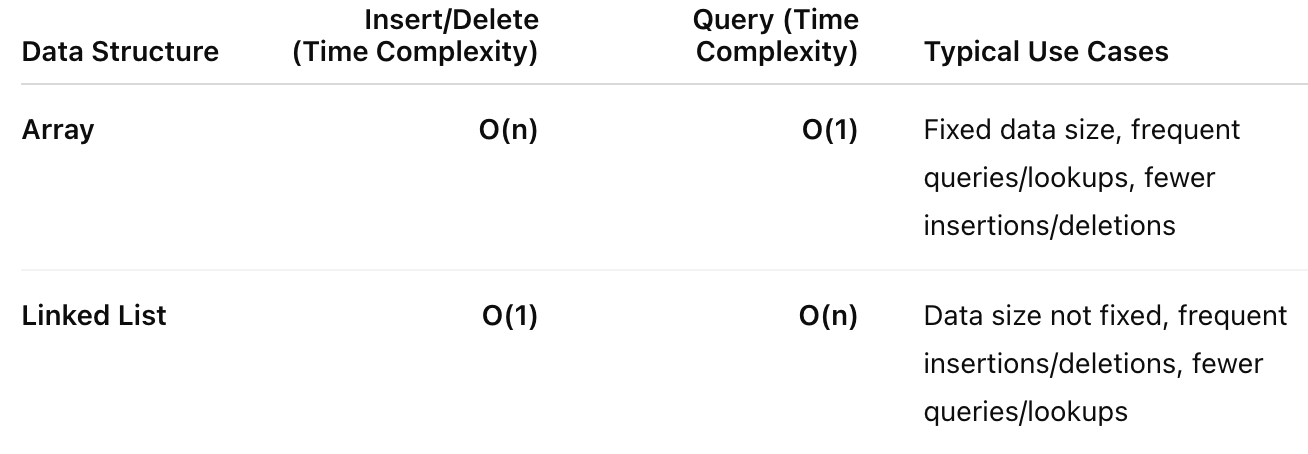

- Arrays have a fixed length once they are defined. If you want to change an array’s length, you need to create (redefine) a new array.

- Linked lists can have a variable length and can be dynamically expanded or reduced with insertions and deletions. However, if you want to delete the 5th node, you need to traverse from the head to find the 4th node first, and then delete using the next pointer. The traversal (search) takes O(n) time.

In [8]:
# Convert linked list to python list
def to_list(head):
    out = []
    while head:
        out.append(head.val)
        head = head.next
    return out

203. Remove Linked List Elements (easy)

Given the head of a linked list and an integer val, remove all the nodes of the linked list that has Node.val == val, and return the new head.

- Time complexity: o(n)
- Space complexity: o(1)

In [15]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def removeElements(self, head, val):
        dummy = ListNode(0) # create a dummy head, which point next to head
        dummy.next = head
        cur = dummy

        while cur.next:
            if cur.next.val == val:
                cur.next = cur.next.next
            else:
                cur = cur.next

        return dummy.next

In [16]:
head = ListNode(1,
        ListNode(2,
        ListNode(6,
        ListNode(3,
        ListNode(4,
        ListNode(5,
        ListNode(6)))))))
val = 6
sol = Solution()
to_list(sol.removeElements(head, val))

[1, 2, 3, 4, 5]

Note:
- Create a dummy head is a common approach in linked list problems. Can return `dummy_head.next` to return the new linked list.
- The deleted 6 doesn’t “point to 3” in the list anymore, because it’s no longer reachable from head. It may still have its own next pointer in memory, but it’s disconnected from the list, so it’s effectively removed.

707. Design linked list (medium)

Implement the `MyLinkedList` class:

- `MyLinkedList()` Initializes the `MyLinkedList` object.
- `int get(int index)` Get the value of the `indexth` node in the linked list. If the index is invalid, return -1.
- `void addAtHead(int val)` Add a node of value `val` before the first element of the linked list. After the insertion, the new node will be the first node of the linked list.
- `void addAtTail(int val)` Append a node of value `val` as the last element of the linked list.
- `void addAtIndex(int index, int val)` Add a node of value `val` before the `indexth` node in the linked list. If `index` equals the length of the linked list, the node will be appended to the end of the linked list. If index is greater than the length, the node will not be inserted.
- `void deleteAtIndex(int index)` Delete the `indexth` node in the linked list, if the index is valid.

Two ways to operate on a linked list:
- Operate directly on the original linked list.
- Use a dummy (sentinel) head node to perform the operations.


In [14]:
def to_list(linked: MyLinkedList):
    """Convert MyLinkedList into a normal Python list of values."""
    res = []
    cur = linked.dummy_head.next  # first real node
    while cur:
        res.append(cur.val)
        cur = cur.next
    return res

In [11]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [18]:
class MyLinkedList:
    def __init__(self):
        self.dummy_head = ListNode(0)
        self.size = 0

    def get(self, index):
        if index < 0 or index >= self.size:
            return -1
        cur = self.dummy_head
        for i in range(index):
            cur = cur.next
        return cur.next.val

    def addAtHead(self, val):
        new_first = ListNode(val, self.dummy_head.next)
        self.dummy_head.next = new_first
        self.size += 1

    def addAtTail(self, val):
        new_last = ListNode(val)
        cur = self.dummy_head
        while cur.next:
            cur = cur.next
        cur.next = new_last
        self.size += 1

    def addAtIndex(self, index, val):
        if index > self.size:
            return
        if index < 0:
            index = 0
        cur = self.dummy_head
        for i in range(index):
            cur = cur.next
        new_insert = ListNode(val, cur.next)
        cur.next = new_insert
        self.size += 1

    def deleteAtIndex(self, index):
        if index < 0 or index >= self.size:
            return
        cur = self.dummy_head
        for i in range(index):
            cur = cur.next
        cur.next = cur.next.next # if last node, cur.next.next is none anyway
        self.size -= 1

In [24]:
ll = MyLinkedList()          # []
ll.addAtHead(1)              # [1]
ll.addAtTail(3)              # [1, 3]
ll.addAtIndex(1, 2)          # [1, 2, 3]
x1 = ll.get(1)               # returns 2
ll.deleteAtIndex(1)          # [1, 3]
x2 = ll.get(1)               # returns 3
print(x1, x2)                # 2 3

2 3


In [ ]:
# double linked list
class ListNode:
    def __init__(self, val=0, prev=None, next=None):
        self.val = val
        self.prev = prev
        self.next = next

class MyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def get(self, index: int) -> int:
        if index < 0 or index >= self.size:
            return -1

        if index < self.size // 2:
            current = self.head
            for i in range(index):
                current = current.next
        else:
            current = self.tail
            for i in range(self.size - index - 1):
                current = current.prev

        return current.val

    def addAtHead(self, val: int) -> None:
        new_node = ListNode(val, None, self.head)
        if self.head:
            self.head.prev = new_node
        else:
            self.tail = new_node
        self.head = new_node
        self.size += 1

    def addAtTail(self, val: int) -> None:
        new_node = ListNode(val, self.tail, None)
        if self.tail:
            self.tail.next = new_node
        else:
            self.head = new_node
        self.tail = new_node
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        if index < 0 or index > self.size:
            return

        if index == 0:
            self.addAtHead(val)
        elif index == self.size:
            self.addAtTail(val)
        else:
            if index < self.size // 2:
                current = self.head
                for i in range(index - 1):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index):
                    current = current.prev
            new_node = ListNode(val, current, current.next)
            current.next.prev = new_node
            current.next = new_node
            self.size += 1

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return

        if index == 0:
            self.head = self.head.next
            if self.head:
                self.head.prev = None
            else:
                self.tail = None
        elif index == self.size - 1:
            self.tail = self.tail.prev
            if self.tail:
                self.tail.next = None
            else:
                self.head = None
        else:
            if index < self.size // 2:
                current = self.head
                for i in range(index):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index - 1):
                    current = current.prev
            current.prev.next = current.next
            current.next.prev = current.prev
        self.size -= 1


Note:
- To insert or delete indexth point: need cur to point to the point before this indexth point. so cur.next point to this indexth one.
- Insert order of action: point new node to its next first and then point the cur to this new node.

21. Merge Two Sorted Lists (easy)

You are given the heads of two sorted linked lists list1 and list2. Merge the two lists into one sorted list.
- Time complexity: o(m+n) - each node visited once
- Space complexity: o(1) - Pointers

In [72]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def mergeTwoLists(self, list1, list2):
        dummy = ListNode()
        cur = dummy

        while list1 and list2:
            if list1.val <= list2.val:
                cur.next = list1
                list1 = list1.next
            else:
                cur.next = list2
                list2 = list2.next
            cur = cur.next

        if not list1:
            cur.next = list2
        if not list2:
            cur.next = list1

        return dummy.next

In [74]:
list1 = ListNode(1,ListNode(2,ListNode(4)))
list2 = ListNode(1,ListNode(3,ListNode(4)))
sol = Solution()
to_list(sol.mergeTwoLists(list1, list2))

[1, 1, 2, 3, 4, 4]

Note:
Without dummy, you’d need special handling for the very first node (setting the head).
With dummy:
- you always do cur.next = ...
- and the head is simply dummy.next

141. Linked List Cycle (easy)

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, `pos` is used to denote the index of the node that tail's next pointer is connected to. Note that `pos` is not passed as a parameter.

- Time complexity: o(n) - visit all nodes
- Space complexity:
    - o(n) - hashset
    - o(1) - Floyd’s Tortoise and Hare is a classic trick to detect a cycle in a linked list using two pointers and no extra memory


In [64]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def hasCycle_1(self, head):
        hashset = set()
        cur = head
        while cur:
            if cur in hashset: # hash check happens after move cur
                return True
            hashset.add(cur)
            cur = cur.next
        return False

    def hasCycle_2(self, head):
        fast, slow = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
        return False

In [65]:
# Create linked list:
# Create nodes
n0 = ListNode(3)
n1 = ListNode(2)
n2 = ListNode(0)
n3 = ListNode(-4)
# Link them: 3 -> 2 -> 0 -> -4
head = n0
n0.next = n1
n1.next = n2
n2.next = n3
# Create the cycle: -4 -> 2 (pos = 1)
n3.next = n1

In [4]:
def print_list(head, k=20):
    cur = head
    i = 0
    while cur and i < k:
        print(cur.val, end=" -> ")
        cur = cur.next
        i += 1
    print("...")  # stopped (end or limit)

In [59]:
print_list(head)

3 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> 0 -> -4 -> 2 -> ...


In [62]:
sol = Solution()
sol.hasCycle_1(head)

True

In [67]:
sol = Solution()
sol.hasCycle_2(head)

True

142. Linked List Cycle II (medium)

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

In [ ]:
class Solution:
    # method 1: hashset
    def detectCycle(self, head):
        hashset = set()
        cur = head
        while cur:
            if cur in hashset:
                return cur
            hashset.add(cur)
            cur = cur.next
        return None

    # method 2: fast and slow pointer
    def detectCycle(self, head):
        slow = fast = head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

            # If there is a cycle, the slow and fast pointers will eventually meet
            if slow == fast:
                # Move one of the pointers back to the start of the list
                index_2 = slow
                index_1 = head
                while index_1 != index_2:
                    index_1 = index_1.next
                    index_2 = index_2.next
                return index_1
        # If there is no cycle, return None
        return None

Note:
- The fast pointer will always enter the cycle first. If the fast and slow pointers meet, they must meet inside the cycle.
- Start one pointer from the head node, and another pointer from the meeting point. Move both pointers one node at a time. When they meet again, the node where they meet is the entry node of the cycle.

206. Reverse Linked List (easy)

Given the `head` of a singly linked list, reverse the list, and return the reversed list.
- Time complexity: o(n)
- Space complexity:
    - o(n): recursion - call stack
    - o(1): iteration - only pointers

In [14]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # recursion
    def reverseList(self, head):
        if not head or not head.next:
            return head
        newhead = self.reverseList(head.next)
        head.next.next = head
        head.next = None
        return newhead

    # iteration: two pointers
    def reverseList_rec(self, head):
        prev = None
        cur = head
        while cur:
            tmp = cur.next
            cur.next = prev
            prev = cur # Move `pre` first
            cur = tmp # and then move `cur`
        return prev

In [15]:
head = ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5)))))
sol = Solution()
print_list(sol.reverseList(head))

5 -> 4 -> 3 -> 2 -> 1 -> ...


In [16]:
head = ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5)))))
sol = Solution()
print_list(sol.reverseList_rec(head))

5 -> 4 -> 3 -> 2 -> 1 -> ...


24. Swap Nodes in Pairs (medium)

Given a linked list, swap every two adjacent nodes and return its head. You must solve the problem without modifying the values in the list's nodes (i.e., only nodes themselves may be changed.)

- Time complexity: o(n)
- Space complexity: o(1)

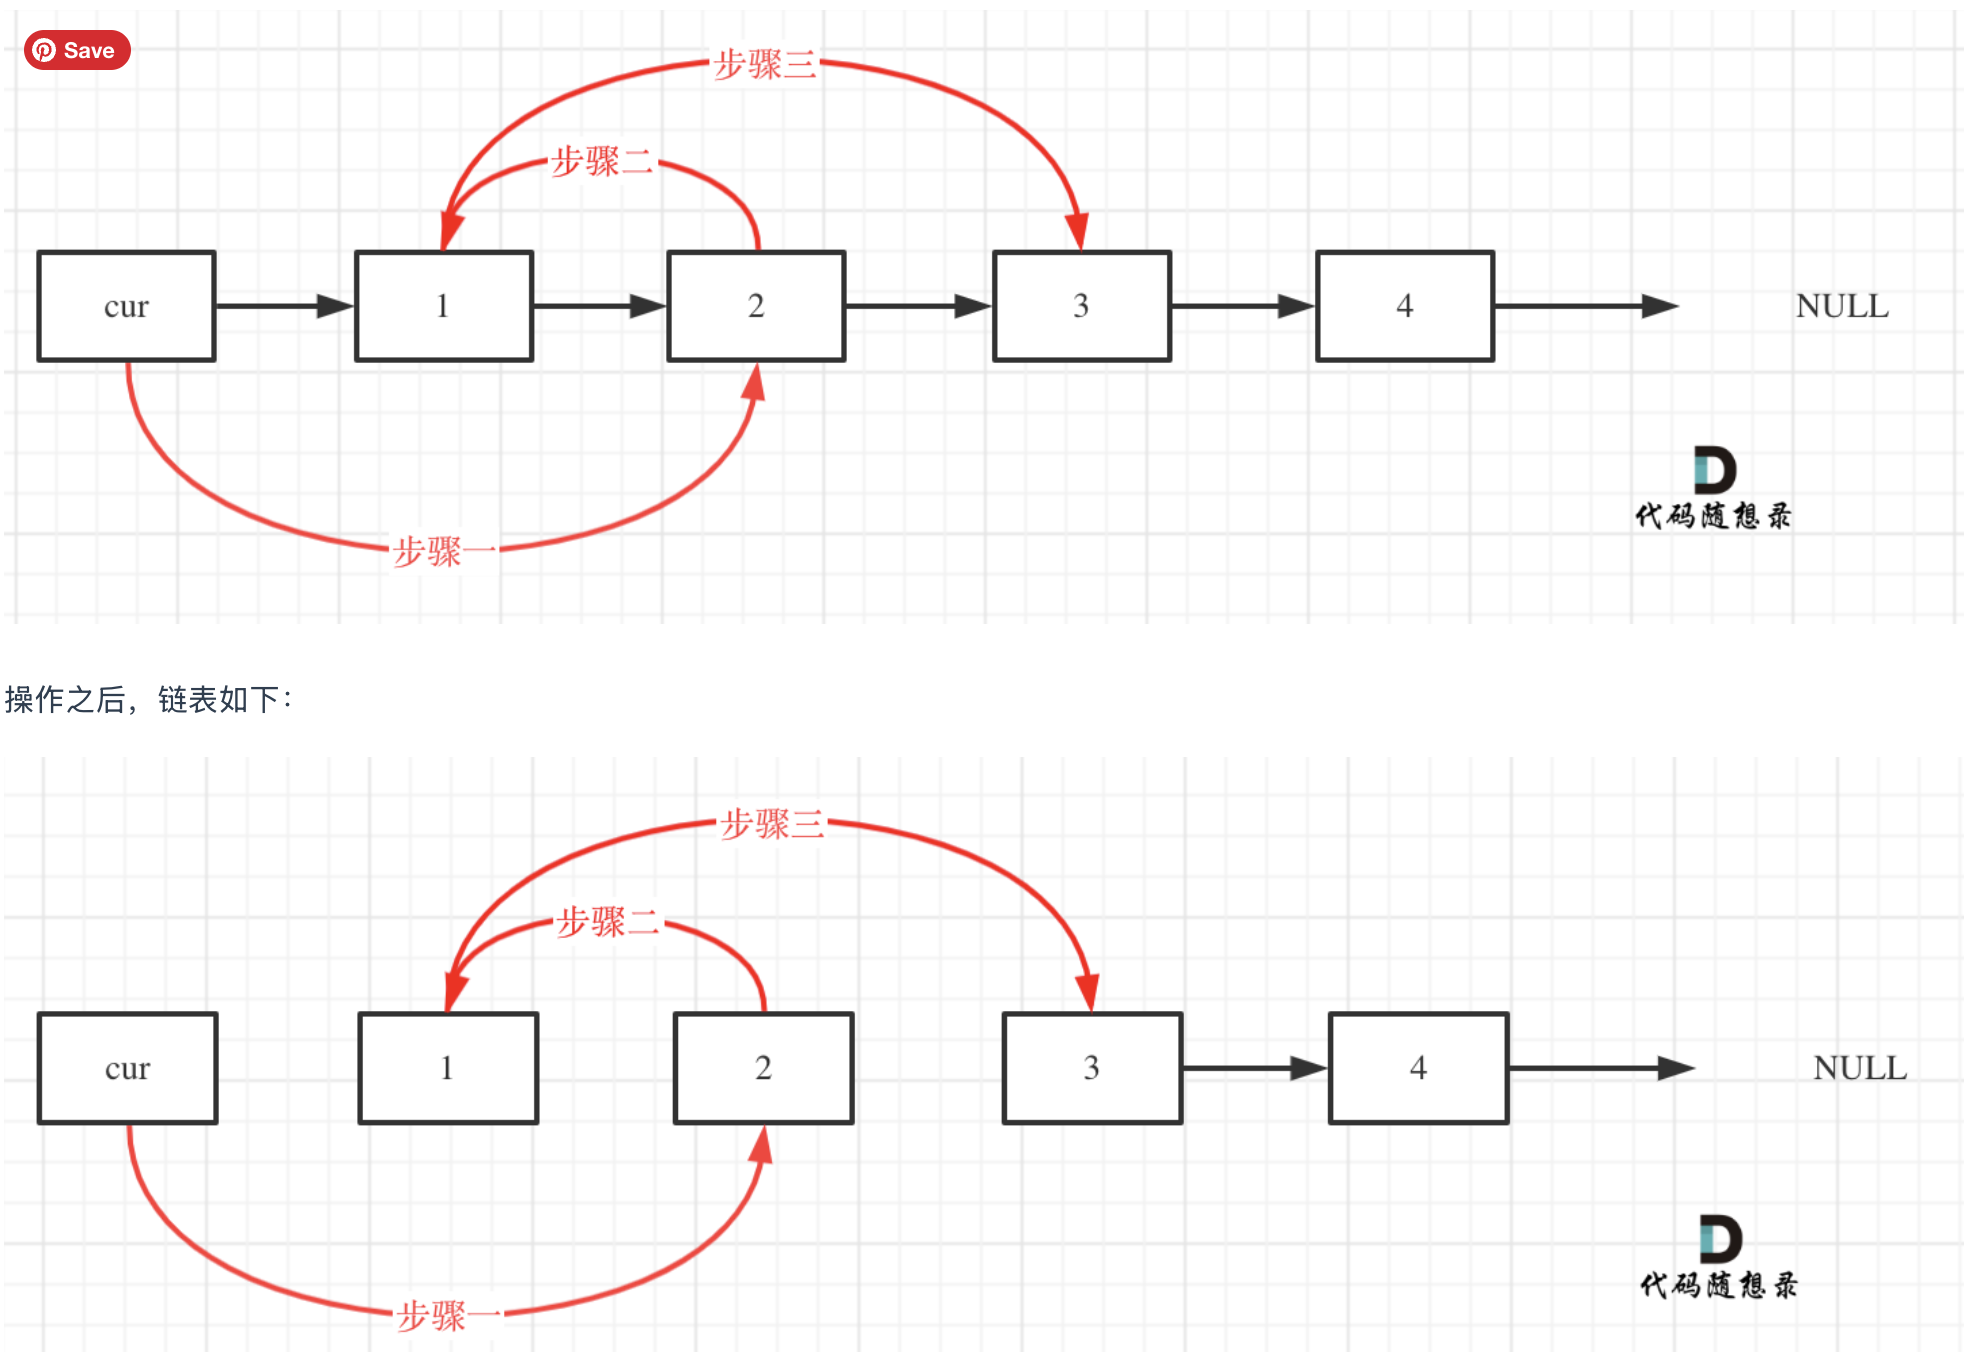

In [ ]:
def swapPairs(head):
    dummy_head = ListNode(0)
    dummy_head.next = head
    cur = dummy_head

    while cur.next and cur.next.next: # need to write cur.next first otherwise 空指针异常报错
        nxt1 = cur.next
        nxt2 = cur.next.next

        nxt1.next = nxt2.next
        nxt2.next = nxt1
        cur.next = nxt2

        cur = nxt1
    return dummy_head.next

Note: 空指针异常报错 - 'NoneType' object has no attribute 'next'

19. Remove Nth Node From End of List (medium)

Given the head of a linked list, remove the nth node from the end of the list and return its head.

- Time complexity: O(n)
- Space complexity: o(1)

In [ ]:
def removeNthFromEnd(head, n):
    dummy_head = ListNode(0)
    dummy_head.next = head
    # dummy_head = ListNode(0, head) # above one line
    fast = slow = dummy_head

    for _ in range(n):
        fast = fast.next

    while fast.next: # tricky!
        fast = fast.next
        slow = slow.next

    slow.next = slow.next.next

    return dummy_head.next

Note: First move fast forward by n steps, then move fast and slow together until fast reaches the end of the list. Then you can delete the node that slow points to.

160. Intersection of Two Linked Lists (easy)

Given the heads of two singly linked-lists headA and headB, return the node at which the two lists intersect. If the two linked lists have no intersection at all, return null.

- Time complexity: o(n)
- Space complexity: o(1)

In [1]:
def getIntersectionNode(headA, headB):
    cur1 = headA
    cur2 = headB
    while cur1 != cur2:
        if cur1:
            cur1 = cur1.next
        else:
            cur1 = headB
        if cur2:
            cur2 = cur2.next
        else:
            cur2 = headA
    return cur1

### **Stack and Queue**

In [ ]:
20. Valid Parentheses (easy)

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.
- Time complexity: o(n)
- Space complexity: o(n) - Stack

In [ ]:
def isValid(str):
    dict = {'(': ')', '[': ']', '{': '}'}
    stack = []

    for i in str:
        if i in dict:
            stack.append(i)
        elif stack and dict[stack[-1]] == i:
            stack.pop()
        else:
            return False

    return not stack

In [ ]:
str = "()[]{}"
isValid(str)
str = "([])"
isValid(str)
str = "([)]"
isValid(str)

### **Binary tree**

100. Same Tree (easy)

Given the roots of two binary trees p and q, write a function to check if they are the same or not. Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.
- Time complexity: o(n), where n is the number of nodes (more precisely O(min(n_p, n_q)) until a mismatch, but worst-case you visit all nodes).
- Space complexity: o(h) = o(log n), recursion call stack

In [15]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # recursive
    def isSameTree(self, p, q):
        if not p and not q: # base case
            return True
        elif not p or not q: # base case
            return False
        elif p.val != q.val: # base case
            return False
        return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right) # recursive case

    # iterative
    def isSameTree_iter(self, p, q):
        stack = [(p, q)]
        while stack:
            a, b = stack.pop()
            if not a and not b:
                continue
            elif not a or not b:
                return False
            elif a.val != b.val:
                return False

            stack.append((a.left, b.left))
            stack.append((a.right, b.right))

        return True

In [59]:
p = TreeNode(1,TreeNode(2),TreeNode(3))
q = TreeNode(1,TreeNode(2),TreeNode(3))
sol = Solution()
sol.isSameTree(p,q)

True

In [18]:
p = TreeNode(1,TreeNode(2))
q = TreeNode(1,TreeNode(),TreeNode(2))
sol = Solution()
sol.isSameTree_iter(p,q)

False

Note:

- AND: True and True = True; True and False = False; False and True = False; False and False = False
- OR: True or True = True; True or False = True; False or True = True; False or False = False

Note: **Recursion call stack**

- A recursion call stack is the “pile” of function calls that Python keeps in memory when a function calls itself.
- The number of stacked calls at the deepest point is the depth of recursion.
- Each time you call a function, Python saves a stack frame with:
    - the function’s local variables (like p, q)
    - where to return to after the call finishes


Note: the base cases are all the situations where you can decide the answer immediately without recursing further, and the recursive case is when you need to compare smaller subtrees.

104. Maximum Depth of Binary Tree (easy)

Given the root of a binary tree, return its maximum depth. A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

- Time complexity: o(n), where n is the number of nodes
- Space complexity:
    - o(h) = o(log n), recursion call stack
    - O(w), worst-case O(n), maximum width w for queue

In [39]:
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxDepth_rec(self, root): # recursive
        if not root:
            return 0
        return 1 + max(self.maxDepth_rec(root.left), self.maxDepth_rec(root.right))

    def maxDepth_iter(self, root): # iterative
        if not root:
            return 0
        q = deque([root])

        count = 0
        while q:
            level_size = len(q) # number of nodes at each level
            for _ in range(level_size):
                node = q.popleft()
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            count += 1
        return count

In [40]:
root = TreeNode(
    3,
    left=TreeNode(9),
    right=TreeNode(20, TreeNode(15), TreeNode(7))
)
sol = Solution()
sol.maxDepth_rec(root)

3

In [24]:
root = TreeNode(
    3,
    left=TreeNode(9),
    right=TreeNode(20, TreeNode(15), TreeNode(7))
)
sol = Solution()
sol.maxDepth_iter(root)

3

226. Invert Binary Tree (easy)

Given the root of a binary tree, invert the tree, and return its root.

In [23]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def invertTree(self, root):
        if not root:
            return None
        root.left, root.right = root.right, root.left
        self.invertTree(root.left)
        self.invertTree(root.right)
        return root

    def invertTree_1(self, root):
        if not root:
            return None
        left = self.invertTree_1(root.left)
        right = self.invertTree_1(root.right)
        root.left = right
        root.right = left
        return root

    def invertTree_2(self, root):
        if not root:
            return None
        root.left, root.right = self.invertTree(root.right), self.invertTree(root.left)
        return root
        # In Python, the entire right-hand side is evaluated first, using the original root.left and root.right.
        # Then Python assigns the two results back at the same time (tuple unpacking).

In [24]:
root = TreeNode(4, left=TreeNode(2, left=TreeNode(1), right=TreeNode(3)),
    right=TreeNode(7, left=TreeNode(6), right=TreeNode(9)))
sol = Solution()
sol.invertTree_1(root)

Note: Below code is wrong as I overwrite `root.left` first, and then I use the already-changed `root.left` when computing `root.right`.

```
def invertTree(self, root):
    if not root:
        return None
    root.left = self.invertTree(root.right)
    root.right = self.invertTree(root.left)
    return root

572. Subtree of Another Tree (easy)

Given the roots of two binary trees root and subRoot, return true if there is a subtree of root with the same structure and node values of subRoot and false otherwise.

- Time complexity: o(n*m) - for each of the N nodes in root, you run sameTree which can take O(M) to fully compare.
- Space complexity: o(logN+logM) - isSubtree recursion can go as deep as H1 and H2 for sameTree recursion

In [17]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isSubtree(self, root, subRoot):

        def isSameTree(p, q): # nested function, not a method inside isSubtree, so no self.
            if not p and not q: # base case
                return True
            elif not p or not q: # base case
                return False
            elif p.val != q.val: # base case
                return False
            return isSameTree(p.left, q.left) and isSameTree(p.right, q.right) # recursive case

        if not subRoot: # base case
            return True
        if not root: # base case
            return False
        if isSameTree(root, subRoot): # base case
            return True
        return self.isSubtree(root.left, subRoot) or self.isSubtree(root.right, subRoot) # recursive case

In [18]:
root = TreeNode(3)
root.left = TreeNode(4)
root.right = TreeNode(5)
root.left.left = TreeNode(1)
root.left.right = TreeNode(2)
subRoot = TreeNode(4)
subRoot.left = TreeNode(1)
subRoot.right = TreeNode(2)

In [19]:
sol = Solution()
sol.isSubtree(root, subRoot)

True